Grupa 5 Bartłomiej Strzelczyk, Mikołaj Golowski, Jakub Ludera 

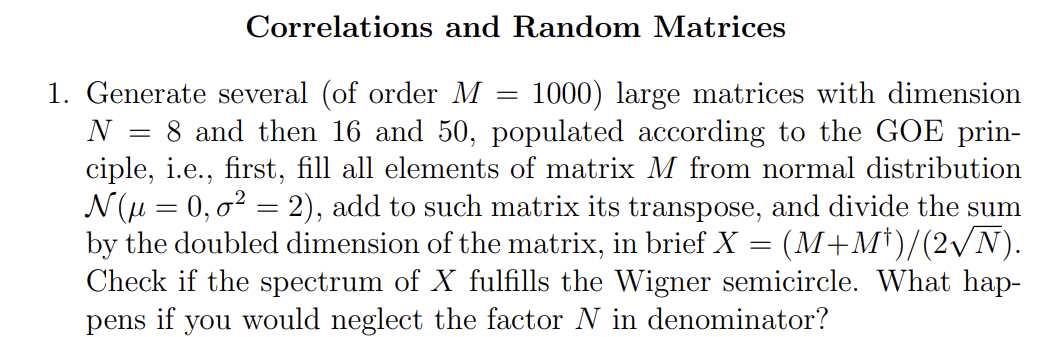

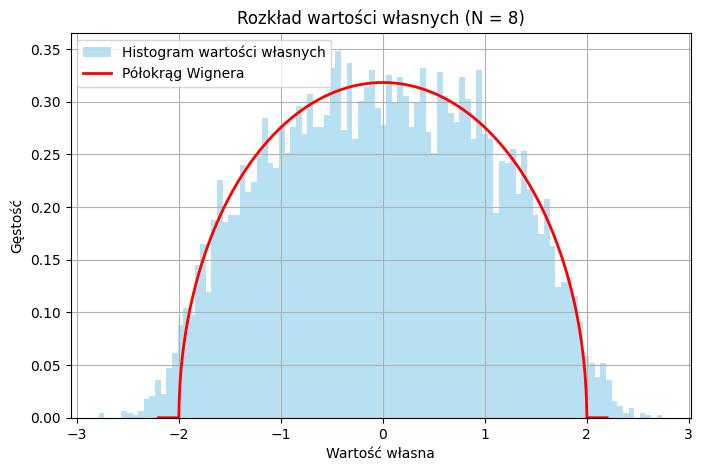

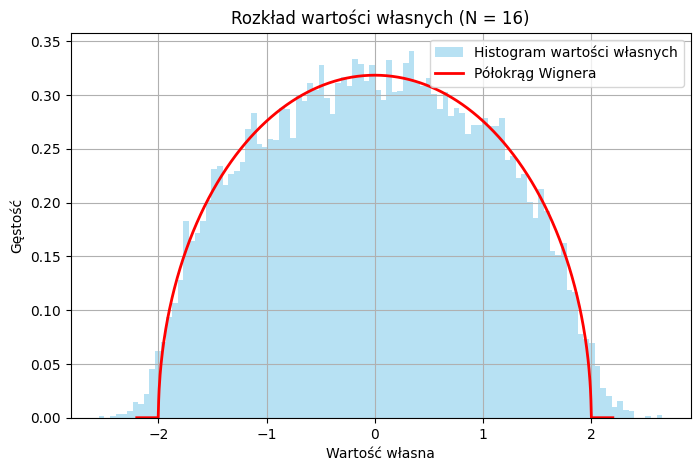

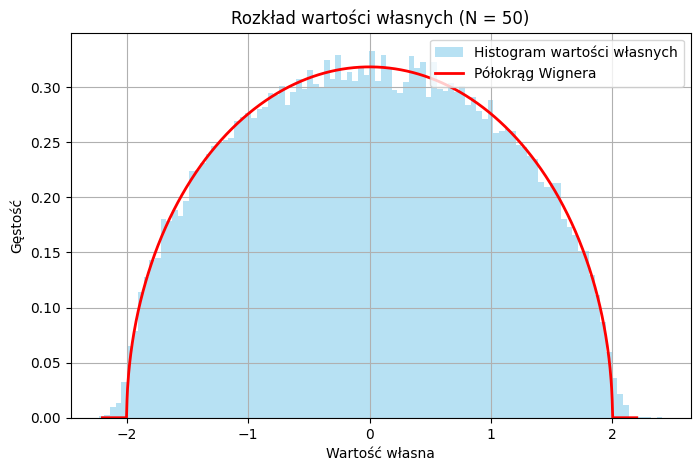

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_goe_matrix(N):
    M = np.random.normal(0, np.sqrt(2), (N, N))
    X = (M + M.T) / (2 * np.sqrt(N))
    return X

def wigner_semicircle(x):
    return (1 / (2 * np.pi)) * np.sqrt(np.maximum(0, 4 - x**2))

N_list = [8, 16, 50]
M = 1000 

x_vals = np.linspace(-2.2, 2.2, 1000)
wigner_vals = wigner_semicircle(x_vals)

for N in N_list:
    eigenvalues = []

    for _ in range(M):
        X = generate_goe_matrix(N)
        eigs = np.linalg.eigvalsh(X) 
        eigenvalues.extend(eigs)

    # Histogram
    plt.figure(figsize=(8, 5))
    plt.hist(eigenvalues, bins=100, density=True, alpha=0.6, color='skyblue', label='Histogram wartości własnych')
    plt.plot(x_vals, wigner_vals, 'r-', lw=2, label='Półokrąg Wignera')
    plt.title(f"Rozkład wartości własnych (N = {N})")
    plt.xlabel("Wartość własna")
    plt.ylabel("Gęstość")
    plt.legend()
    plt.grid(True)
    plt.show()


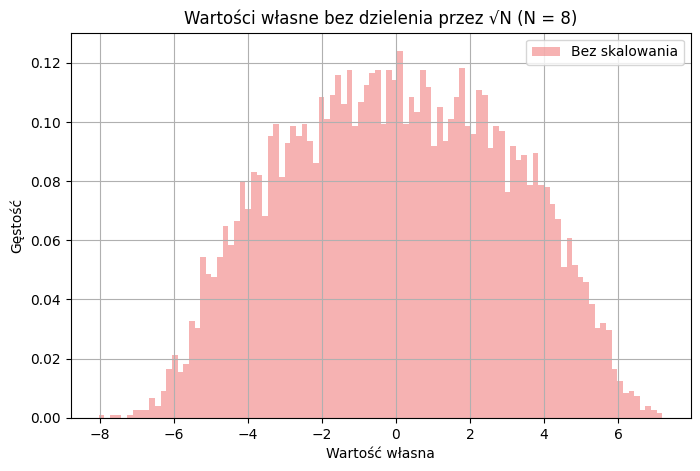

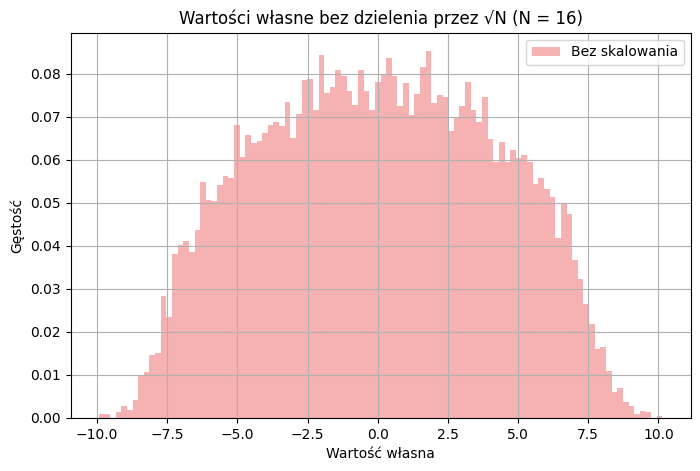

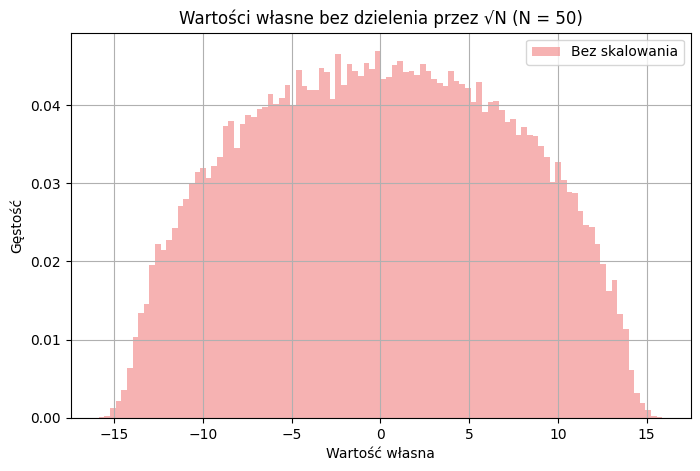

In [ ]:
def generate_unscaled_goe_matrix(N):
    M = np.random.normal(0, np.sqrt(2), (N, N))
    X = (M + M.T) / 2  #bez dzielenia przez sqrtN
    return X

for N in N_list:
    eigenvalues = []

    for _ in range(M):
        X = generate_unscaled_goe_matrix(N)
        eigs = np.linalg.eigvalsh(X)
        eigenvalues.extend(eigs)

    plt.figure(figsize=(8, 5))
    plt.hist(eigenvalues, bins=100, density=True, alpha=0.6, color='lightcoral', label='Bez skalowania')
    plt.title(f"Wartości własne bez dzielenia przez √N (N = {N})")
    plt.xlabel("Wartość własna")
    plt.ylabel("Gęstość")
    plt.legend()
    plt.grid(True)
    plt.show()


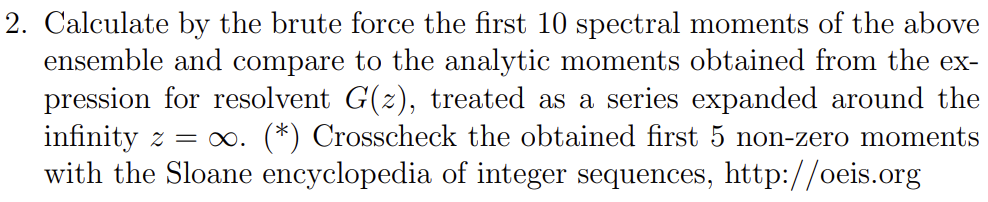

In [1]:
import numpy as np

def generate_goe_matrix(N):
    M = np.random.normal(0, np.sqrt(2), (N, N))
    return (M + M.T) / (2 * np.sqrt(N))

def compute_empirical_moments(N, M, max_order=10):
    moments = np.zeros(max_order)
    for _ in range(M):
        X = generate_goe_matrix(N)
        for k in range(1, max_order + 1):
            moments[k-1] += np.trace(np.linalg.matrix_power(X, k)) / N
    return moments / M


N = 50  
M = 1000   
k_max = 10

empirical_moments = compute_empirical_moments(N, M, k_max)
print("Bruteforce (empiryczne) momenty spektralne:")
for i, mu in enumerate(empirical_moments, 1):
    print(f"μ_{i} = {mu:.5f}")


Bruteforce (empiryczne) momenty spektralne:
μ_1 = 0.00035
μ_2 = 1.02145
μ_3 = 0.00059
μ_4 = 2.10741
μ_5 = -0.00048
μ_6 = 5.48050
μ_7 = -0.01606
μ_8 = 16.08944
μ_9 = -0.11641
μ_10 = 51.00697


In [2]:
from math import comb

def analytical_moments(max_order=10):
    moments = []
    for k in range(1, max_order + 1):
        if k % 2 == 1:
            moments.append(0)
        else:
            n = k // 2
            catalan = comb(2 * n, n) // (n + 1)
            moments.append(catalan)
    return moments

theoretical_moments = analytical_moments(k_max)

print("\nAnalityczne momenty półokręgu Wignera:")
for i, mu in enumerate(theoretical_moments, 1):
    print(f"μ_{i} = {mu}")



Analityczne momenty półokręgu Wignera:
μ_1 = 0
μ_2 = 1
μ_3 = 0
μ_4 = 2
μ_5 = 0
μ_6 = 5
μ_7 = 0
μ_8 = 14
μ_9 = 0
μ_10 = 42


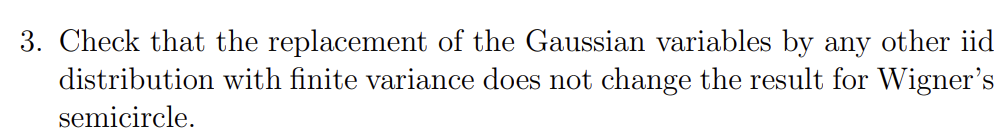

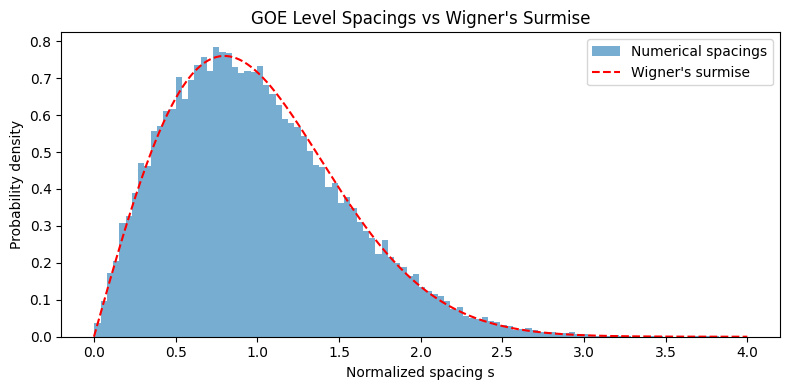

In [6]:
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh

def generate_goe_matrix(N):
    A = np.random.normal(0, 1, size=(N, N))
    A = (A + A.T) / 2
    return A / np.sqrt(N)

def get_normalized_spacings(N, samples):
    spacings = []
    for _ in range(samples):
        M = generate_goe_matrix(N)
        eigenvalues = np.sort(eigvalsh(M))
        center = N // 2
        for k in range(center - 1, center + 2):
            s = eigenvalues[k+1] - eigenvalues[k]
            spacings.append(s)
    spacings = np.array(spacings)
    return spacings / np.mean(spacings)

N = 16
samples = 10000
spacings = get_normalized_spacings(N, samples)

plt.figure(figsize=(8, 4))
plt.hist(spacings, bins=100, density=True, alpha=0.6, label='Numerical spacings')
s_vals = np.linspace(0, 4, 500)
p_wigner = (np.pi / 2) * s_vals * np.exp(- (np.pi / 4) * s_vals**2)
plt.plot(s_vals, p_wigner, 'r--', label="Wigner's surmise")

plt.xlabel("Normalized spacing s")
plt.ylabel("Probability density")
plt.title("GOE Level Spacings vs Wigner's Surmise")
plt.legend()
plt.tight_layout()
plt.show()


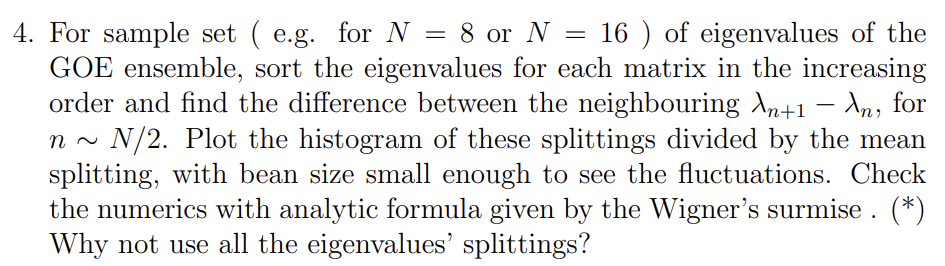

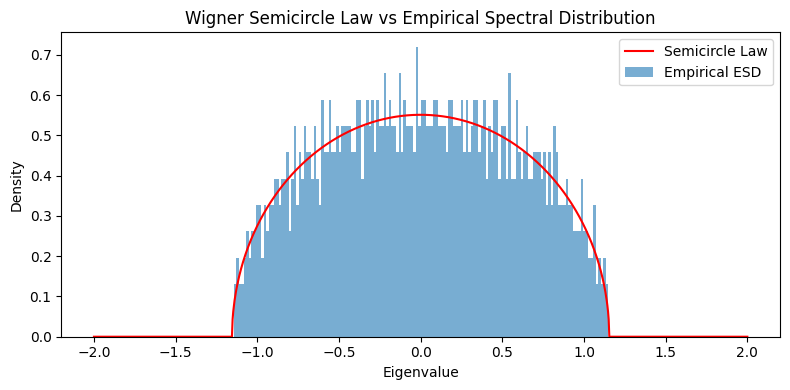

In [7]:
def generate_wigner_matrix(n, sampler):
    M = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            if i == j:
                M[i, j] = sampler()
            else:
                val = sampler()
                M[i, j] = val
                M[j, i] = val
    return M / np.sqrt(n)

def empirical_spectral_distribution(eigenvalues, bins=100):
    hist, bin_edges = np.histogram(eigenvalues, bins=bins, density=True)
    centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    return centers, hist

def semicircle_density(x, sigma=1):
    return (1 / (2 * np.pi * sigma**2)) * np.sqrt(np.maximum(0, 4 * sigma**2 - x**2))

n = 1000
sampler = lambda: np.random.uniform(-1, 1)
W = generate_wigner_matrix(n, sampler)
eigenvalues = eigvalsh(W)


x_empirical, y_empirical = empirical_spectral_distribution(eigenvalues, bins=150)
x_vals = np.linspace(-2, 2, 1000)
y_semicircle = semicircle_density(x_vals, sigma=np.sqrt(1/3))#Var[uniform(-1,1)]=1/3

plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_semicircle, color='red', label='Semicircle Law')
plt.bar(x_empirical, y_empirical, width=(x_empirical[1] - x_empirical[0]), alpha=0.6, label='Empirical ESD')
plt.legend()
plt.title("Wigner Semicircle Law vs Empirical Spectral Distribution")
plt.xlabel("Eigenvalue")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


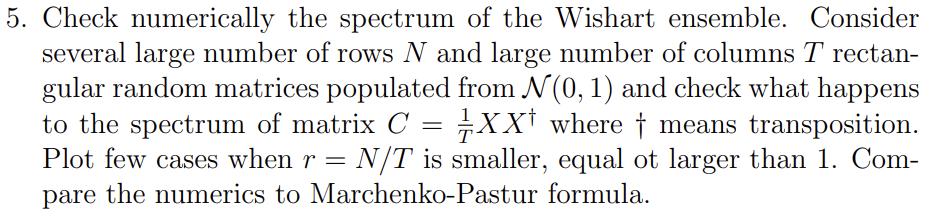

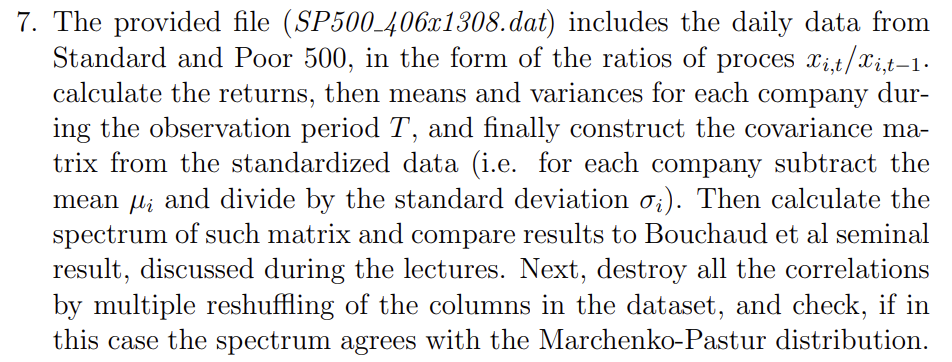